In [11]:
import os
import requests
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv("./best_50_times_100m_with_city_temperature.csv", encoding='UTF-8')
df

,Unnamed: 0,Unnamed: 0.1,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Km/h,Temp
0,0,6088,1,00:00:09.580000,Usain Bolt,JAM,1986-08-21,1.0,Berlin,2009-08-16,Men,100 m,37.578288,24.8
1,1,6089,2,00:00:09.630000,Usain Bolt,JAM,1986-08-21,1.0,London,2012-08-05,Men,100 m,37.383178,16.9
2,2,6090,3,00:00:09.690000,Usain Bolt,JAM,1986-08-21,1.0,Beijing,2008-08-16,Men,100 m,37.151703,24.6
3,3,6091,3,00:00:09.690000,Tyson Gay,USA,1982-08-09,1.0,Shanghai,2009-09-20,Men,100 m,37.151703,25.2
4,4,6092,3,00:00:09.690000,Yohan Blake,JAM,1989-12-26,1.0,Lausanne,2012-08-23,Men,100 m,37.151703,23.8
5,5,6093,6,00:00:09.710000,Tyson Gay,USA,1982-08-09,2.0,Berlin,2009-08-16,Men,100 m,37.075180,24.8
6,6,6094,7,00:00:09.720000,Usain Bolt,JAM,1986-08-21,1.0,New York City,2008-05-31,Men,100 m,37.037037,20.8
7,7,6095,7,00:00:09.720000,Asafa Powell,JAM,1982-11-23,1.0,Lausanne,2008-09-02,Men,100 m,37.037037,19.9
8,8,6096,9,00:00:09.740000,Asafa Powell,JAM,1982-11-23,1.0,Rieti,2007-09-09,Men,100 m,36.960986,14.7
9,9,6097,9,00:00:09.740000,Justin Gatlin,USA,1982-02-10,1.0,Ad-Dawhah,2015-05-15,Men,100 m,36.960986,26.1


In [8]:
df = df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'])
df.head()

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Km/h,Temp,Year
0,1,00:00:09.580000,Usain Bolt,JAM,1986-08-21,1.0,Berlin,2009-08-16,Men,100 m,37.578288,24.8,2009-08-16
1,2,00:00:09.630000,Usain Bolt,JAM,1986-08-21,1.0,London,2012-08-05,Men,100 m,37.383178,16.9,2012-08-05
2,3,00:00:09.690000,Usain Bolt,JAM,1986-08-21,1.0,Beijing,2008-08-16,Men,100 m,37.151703,24.6,2008-08-16
3,3,00:00:09.690000,Tyson Gay,USA,1982-08-09,1.0,Shanghai,2009-09-20,Men,100 m,37.151703,25.2,2009-09-20
4,3,00:00:09.690000,Yohan Blake,JAM,1989-12-26,1.0,Lausanne,2012-08-23,Men,100 m,37.151703,23.8,2012-08-23


In [5]:
df['Year'] = df['Date']
df

,Unnamed: 0,Unnamed: 0.1,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Km/h,Temp,Year
0,0,6088,1,00:00:09.580000,Usain Bolt,JAM,1986-08-21,1.0,Berlin,2009-08-16,Men,100 m,37.578288,24.8,2009-08-16
1,1,6089,2,00:00:09.630000,Usain Bolt,JAM,1986-08-21,1.0,London,2012-08-05,Men,100 m,37.383178,16.9,2012-08-05
2,2,6090,3,00:00:09.690000,Usain Bolt,JAM,1986-08-21,1.0,Beijing,2008-08-16,Men,100 m,37.151703,24.6,2008-08-16
3,3,6091,3,00:00:09.690000,Tyson Gay,USA,1982-08-09,1.0,Shanghai,2009-09-20,Men,100 m,37.151703,25.2,2009-09-20
4,4,6092,3,00:00:09.690000,Yohan Blake,JAM,1989-12-26,1.0,Lausanne,2012-08-23,Men,100 m,37.151703,23.8,2012-08-23
5,5,6093,6,00:00:09.710000,Tyson Gay,USA,1982-08-09,2.0,Berlin,2009-08-16,Men,100 m,37.075180,24.8,2009-08-16
6,6,6094,7,00:00:09.720000,Usain Bolt,JAM,1986-08-21,1.0,New York City,2008-05-31,Men,100 m,37.037037,20.8,2008-05-31
7,7,6095,7,00:00:09.720000,Asafa Powell,JAM,1982-11-23,1.0,Lausanne,2008-09-02,Men,100 m,37.037037,19.9,2008-09-02
8,8,6096,9,00:00:09.740000,Asafa Powell,JAM,1982-11-23,1.0,Rieti,2007-09-09,Men,100 m,36.960986,14.7,2007-09-09
9,9,6097,9,00:00:09.740000,Justin Gatlin,USA,1982-02-10,1.0,Ad-Dawhah,2015-05-15,Men,100 m,36.960986,26.1,2015-05-15


In [9]:
df.Year = df.Year.str[:4]
df.head()

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Km/h,Temp,Year
0,1,00:00:09.580000,Usain Bolt,JAM,1986-08-21,1.0,Berlin,2009-08-16,Men,100 m,37.578288,24.8,2009
1,2,00:00:09.630000,Usain Bolt,JAM,1986-08-21,1.0,London,2012-08-05,Men,100 m,37.383178,16.9,2012
2,3,00:00:09.690000,Usain Bolt,JAM,1986-08-21,1.0,Beijing,2008-08-16,Men,100 m,37.151703,24.6,2008
3,3,00:00:09.690000,Tyson Gay,USA,1982-08-09,1.0,Shanghai,2009-09-20,Men,100 m,37.151703,25.2,2009
4,3,00:00:09.690000,Yohan Blake,JAM,1989-12-26,1.0,Lausanne,2012-08-23,Men,100 m,37.151703,23.8,2012


In [26]:
df["Km/h"].describe()

count    50.000000
mean     36.877704
std       0.171105
min      36.697248
25%      36.772217
50%      36.847492
75%      36.923077
max      37.578288
Name: Km/h, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

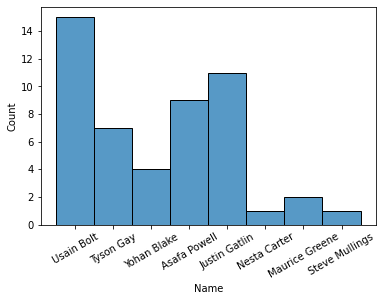

In [75]:
#En esta grafica hemos mostrado el nombre de los corredores que ocupan las 50 mejores marcas. 
#Podemos comprobar como algunos de ellos aparecen varias veces en esta lista (Usain Bolt aparece 15 veces en este ranking).
sns.histplot(df["Name"])
plt.xticks(rotation=30)

([<matplotlib.patches.Wedge at 0x11f1e79d0>,
 [Text(-0.3399187721714582, 1.046162142464278, 'JAM'),
  Text(0.3399188701202255, -1.0461621106387813, 'USA')],
 [Text(-0.18541023936624992, 0.5706338958896061, '60%'),
  Text(0.18541029279285026, -0.5706338785302443, '40%')])

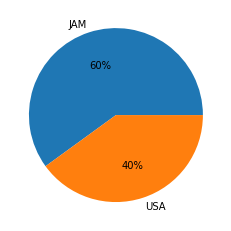

In [76]:
#En este pie mostramos los países que más veces aparecen en ese top 50. Se reparten entre Jamaica y USA.
plt.pie(df['Country'].value_counts(),labels=('JAM','USA'),autopct='%1.0f%%')

<AxesSubplot:xlabel='Temp', ylabel='Count'>

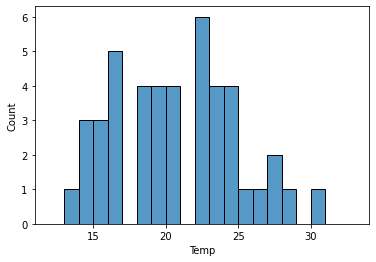

In [77]:
sns.histplot(df["Temp"].sort_values(), binrange=(12,33), binwidth=1)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

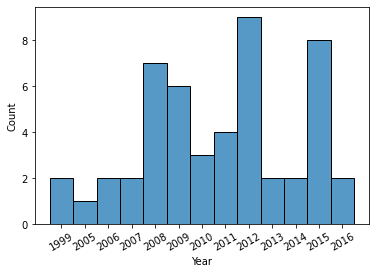

In [55]:
#En esta gráfica he mostrado la cantidad de mejores tiempos conseguidos cada año

sns.histplot(df["Year"].sort_values())
plt.xticks(rotation=30)